In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode
from helper_functions import energy_name

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "scattering_methods"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
df_highland = pd.read_hdf('data/scattering_methods/total_defl_highland.hdf5')
df_highlandintegral = pd.read_hdf('data/scattering_methods/total_defl_highlandintegral.hdf5')
df_moliere = pd.read_hdf('data/scattering_methods/total_defl_moliere.hdf5')
df_stochastic = pd.read_hdf('data/scattering_methods/total_defl_stochastic.hdf5')
df_stochastic_moliere = pd.read_hdf('data/scattering_methods/total_defl_stochastic_moliere.hdf5')
df_stochastic_highland = pd.read_hdf('data/scattering_methods/total_defl_stochastic_highland.hdf5')

In [4]:
E_i = df_highland.E_i[0] * 1e3 # in MeV
E_f = mode(df_highland.E_f) * 1e3 # in MeV 
n_events = len(df_highland)

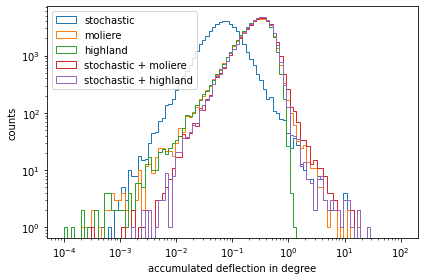

In [5]:
# Deflection
bins = np.logspace(-4, 2, 101)

plt.hist(df_stochastic.deflection, bins=bins, histtype='step', label='stochastic')
plt.hist(df_moliere.deflection, bins=bins, histtype='step', label='moliere')
plt.hist(df_highland.deflection, bins=bins, histtype='step', label='highland')
plt.hist(df_stochastic_moliere.deflection, bins=bins, histtype='step', label='stochastic + moliere')
plt.hist(df_stochastic_highland.deflection, bins=bins, histtype='step', label='stochastic + highland')



# plt.hist(df_highlandintegral.deflection, bins=bins, histtype='step', label='highlandintegral')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

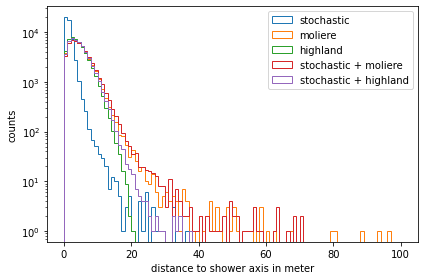

In [6]:
# Distance to shower axis 
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_highlandintegral = np.sqrt(df_highlandintegral.x_f**2 + df_highlandintegral.y_f**2) / 1e2 # in meter
d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_stochastic = np.sqrt(df_stochastic.x_f**2 + df_stochastic.y_f**2) / 1e2 # in meter
d_shower_stochastic_moliere = np.sqrt(df_stochastic_moliere.x_f**2 + df_stochastic_moliere.y_f**2) / 1e2 # in meter
d_shower_stochastic_highland = np.sqrt(df_stochastic_highland.x_f**2 + df_stochastic_highland.y_f**2) / 1e2 # in meter

bins = np.linspace(0, 100, 101)
plt.hist(d_shower_stochastic, bins=bins, histtype='step', label='stochastic')
plt.hist(d_shower_moliere, bins=bins, histtype='step', label='moliere')
plt.hist(d_shower_highland, bins=bins, histtype='step', label='highland')
plt.hist(d_shower_stochastic_moliere, bins=bins, histtype='step', label='stochastic + moliere')
plt.hist(d_shower_stochastic_highland, bins=bins, histtype='step', label='stochastic + highland')


# plt.hist(d_shower_highlandintegral, bins=bins, histtype='step', label='highlandintegral')
plt.yscale('log')
plt.xlabel('distance to shower axis in meter')
plt.ylabel('counts')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))